In [16]:
import numpy as np
import pandas as pd
from results_v2 import *
from bronx.stdtypes.date import daterangex as rangex
import matplotlib.pyplot as plt
from matplotlib import colors

In [17]:
data_train_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_train/'
data_valid_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_test/'
data_test_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_test/'
data_static_location = '/cnrm/recyf/Data/users/danjoul/dataset/'
baseline_location = '/cnrm/recyf/Data/users/danjoul/dataset/baseline/test/'

params = ['t2m']
static_fields = []
dates_train = rangex(['2020070100-2021053100-PT24H']) # à modifier
dates_valid = rangex(['2022020100-2022022800-PT24H', '2022040100-2022043000-PT24H', '2022060100-2022063000-PT24H']) # à modifier
dates_test = rangex(['2022030100-2022033100-PT24H', '2022050100-2022053100-PT24H']) # à modifier
resample = 'r'
param = 't2m'
echeances = range(6, 37, 3)
working_dir = '/cnrm/recyf/Data/users/danjoul/unet_experiments/unet_4/0.005_32_100/t2m/'

In [18]:
root_dir = '/cnrm/recyf/Data/users/danjoul/unet_experiments/unet_4/0.005_32_100/'
expes = pd.DataFrame(
    {'name' : ['t2m','SURFGEOPOTENTIEL', 'uv10', 'toa', 'cape'],
    'dir' : [
    root_dir + 't2m/',
    root_dir + 'SURFGEOPOTENTIEL/',
    root_dir + 'uv10/',
    root_dir + 'toa/',
    root_dir + 'cape/'        
    ]}
)
expes.head()


,name,dir
0,t2m,/cnrm/recyf/Data/users/danjoul/unet_experiment...
1,SURFGEOPOTENTIEL,/cnrm/recyf/Data/users/danjoul/unet_experiment...
2,uv10,/cnrm/recyf/Data/users/danjoul/unet_experiment...
3,toa,/cnrm/recyf/Data/users/danjoul/unet_experiment...
4,cape,/cnrm/recyf/Data/users/danjoul/unet_experiment...


missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00


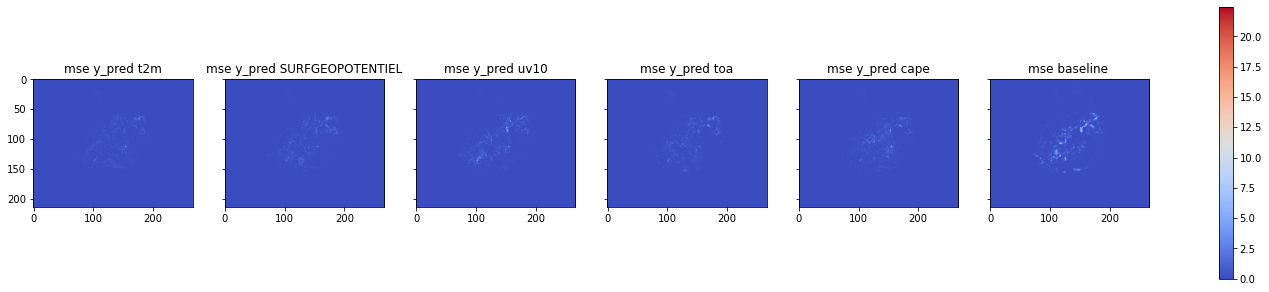

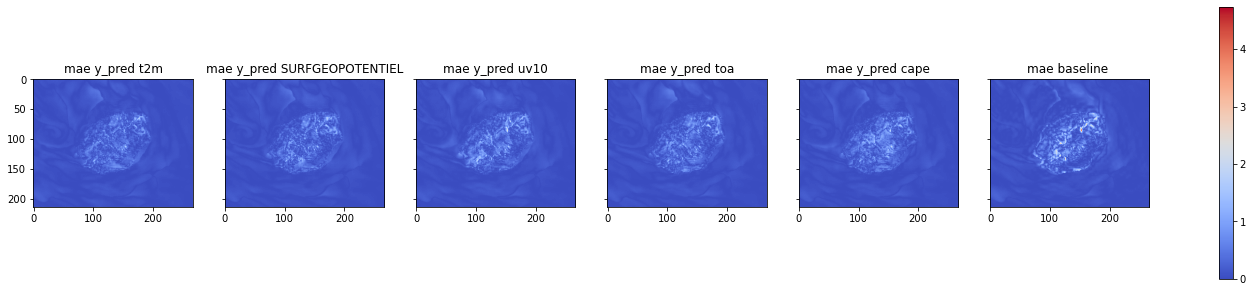

In [50]:
# plot score maps:
# def synthesis_score_maps(expes, metric, metric_name, dates_test, echeances, resample, data_test_location, baseline_location, param='t2m'):
#     for k in range(1):
#         fig, axs = plt.subplots(nrows=2, ncols=len(expes), figsize=(5*len(expes), 8))
#         images = []
#         for j in range(len(expes)):
#             working_dir = expes.dir[j]
#             name = expes.name[j]
#             results_df = load_data(working_dir, dates_test, echeances, resample, data_test_location, baseline_location, param=param)
#             metric_df  = get_scores(results_df, metric, metric_name)
#             data = [metric_df[metric_name + '_baseline_map'][k], metric_df[metric_name + '_y_pred_map'][k]]
#             for i in range(len(data)):
#                 im = axs[i, j].imshow(data[i], cmap='coolwarm')
#                 images.append(im)
#                 axs[i, j].label_outer()
#             axs[0, j].set_title(metric_name + ' baseline ' + name)
#             axs[1, j].set_title(metric_name + ' y_pred ' + name)

#         vmin = min(image.get_array().min() for image in images)
#         vmax = max(image.get_array().max() for image in images)
#         norm = colors.Normalize(vmin=vmin, vmax=vmax)
#         for im in images:
#             im.set_norm(norm)
#         fig.colorbar(images[0], ax=axs)
#         # plt.savefig(output_dir + metric_name + str(k) + '_map.png')

def synthesis_score_maps(expes, metric, metric_name, dates_test, echeances, resample, data_test_location, baseline_location, param='t2m'):
    for k in range(1):
        fig, axs = plt.subplots(nrows=1, ncols=len(expes)+1, figsize=(5*len(expes), 5))
        images = []
        for j in range(len(expes)):
            working_dir = expes.dir[j]
            name = expes.name[j]
            results_df = load_data(working_dir, dates_test, echeances, resample, data_test_location, baseline_location, param=param)
            metric_df  = get_scores(results_df, metric, metric_name)
            im = axs[j].imshow(metric_df[metric_name + '_y_pred_map'][k], cmap='coolwarm')
            images.append(im)
            axs[j].label_outer()
            axs[j].set_title(metric_name + ' y_pred ' + name)
        im = axs[j+1].imshow(metric_df[metric_name + '_baseline_map'][k], cmap='coolwarm')
        images.append(im)
        axs[j+1].label_outer()
        axs[j+1].set_title(metric_name + ' baseline ')

        vmin = min(image.get_array().min() for image in images)
        vmax = max(image.get_array().max() for image in images)
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        for im in images:
            im.set_norm(norm)
        fig.colorbar(images[0], ax=axs)
        # plt.savefig(output_dir + metric_name + str(k) + '_map.png')

synthesis_score_maps(expes, mse, 'mse', dates_test, echeances, resample, data_test_location, baseline_location, param)
synthesis_score_maps(expes, mae, 'mae', dates_test, echeances, resample, data_test_location, baseline_location, param)

missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 

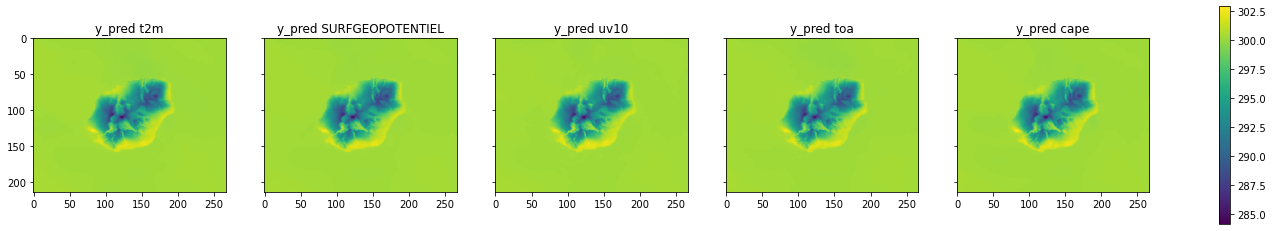

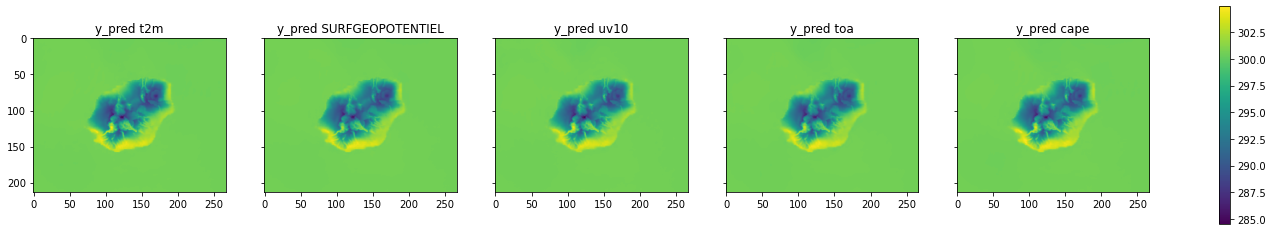

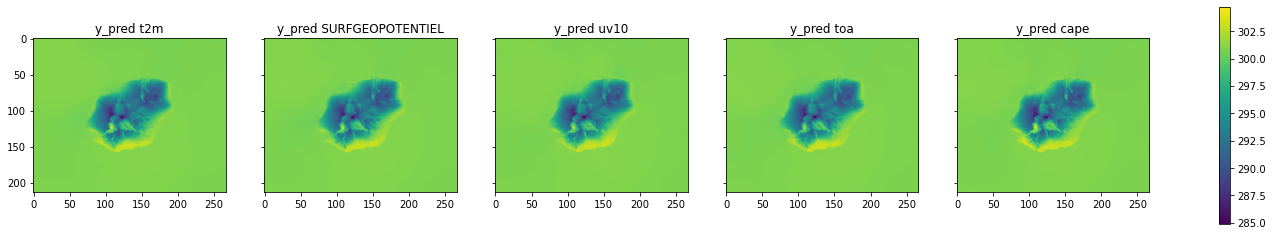

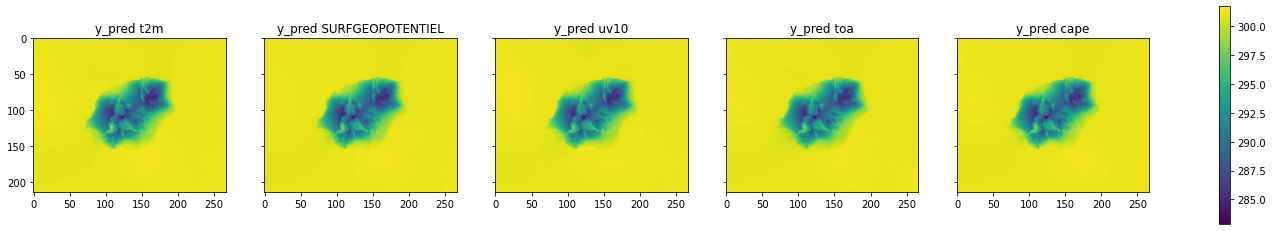

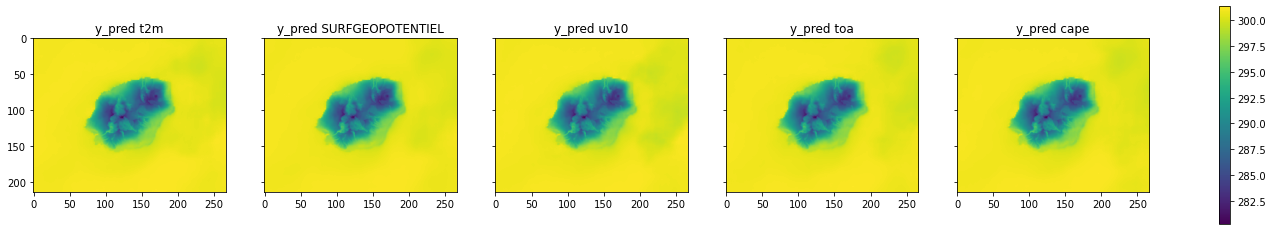

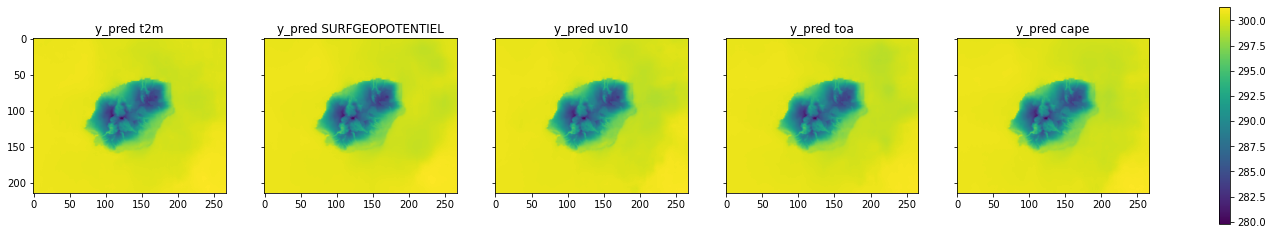

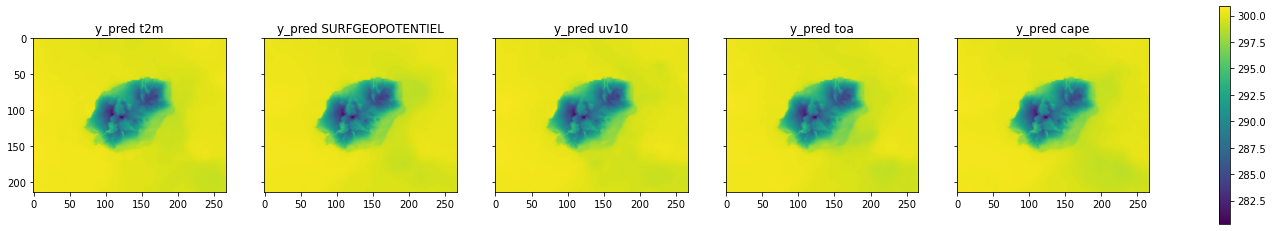

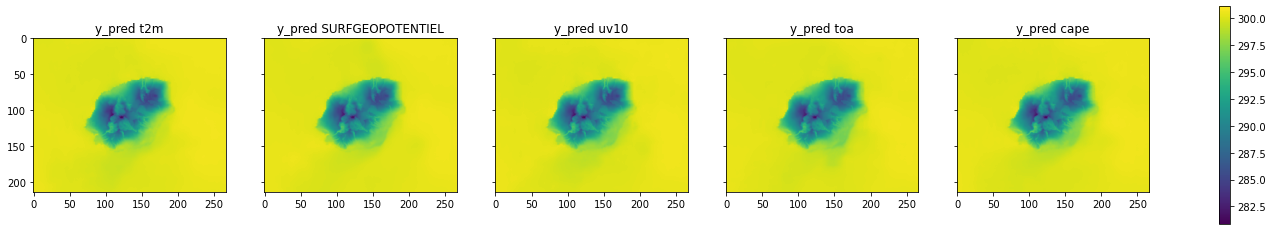

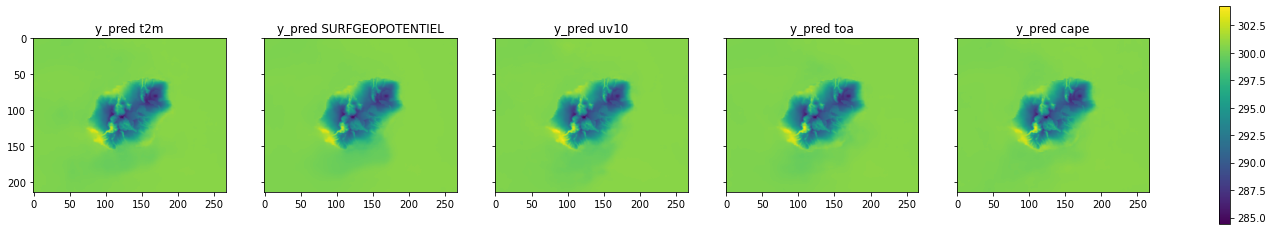

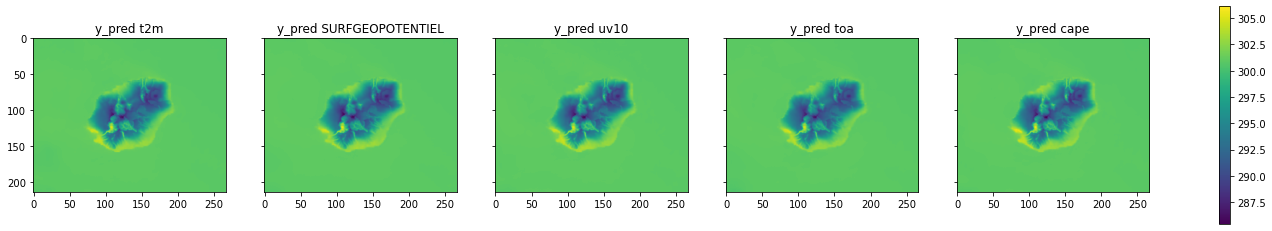

In [22]:
# plot maps:
def synthesis_score_maps(expes, dates_test, echeances, resample, data_test_location, baseline_location, param='t2m', full=False):
    for k in range(10):
        if full:
            fig, axs = plt.subplots(nrows=4, ncols=len(expes), figsize=(5*len(expes), 16))
            images = []
            for j in range(len(expes)):
                working_dir = expes.dir[j]
                name = expes.name[j]
                results_df = load_data(working_dir, dates_test, echeances, resample, data_test_location, baseline_location, param=param)
                data = [results_df.X_test[k], results_df.baseline[k], results_df.y_pred[k], results_df.y_test[k]]
                for i in range(len(data)):
                    im = axs[i, j].imshow(data[i], cmap='viridis')
                    images.append(im)
                    axs[i, j].label_outer()
                axs[0, j].set_title('X_test ' + name)
                axs[1, j].set_title('baseline ' + name)
                axs[2, j].set_title('y_pred ' + name)
                axs[3, j].set_title('y_test ' + name)

            vmin = min(image.get_array().min() for image in images)
            vmax = max(image.get_array().max() for image in images)
            norm = colors.Normalize(vmin=vmin, vmax=vmax)
            for im in images:
                im.set_norm(norm)
            fig.colorbar(images[0], ax=axs)
            # plt.savefig(output_dir + 'synthesis_' + str(k) + '_map.png')
        else:
            fig, axs = plt.subplots(nrows=1, ncols=len(expes), figsize=(5*len(expes), 4))
            images = []
            for j in range(len(expes)):
                working_dir = expes.dir[j]
                name = expes.name[j]
                results_df = load_data(working_dir, dates_test, echeances, resample, data_test_location, baseline_location, param=param)
                im = axs[j].imshow(results_df.y_pred[k], cmap='viridis')
                images.append(im)
                axs[j].label_outer()
                axs[j].set_title('y_pred ' + name)

            vmin = min(image.get_array().min() for image in images)
            vmax = max(image.get_array().max() for image in images)
            norm = colors.Normalize(vmin=vmin, vmax=vmax)
            for im in images:
                im.set_norm(norm)
            fig.colorbar(images[0], ax=axs)
            # plt.savefig(output_dir + 'synthesis_' + str(k) + '_map.png')

synthesis_score_maps(expes, dates_test, echeances, resample, data_test_location, baseline_location, param, full=False)

missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00


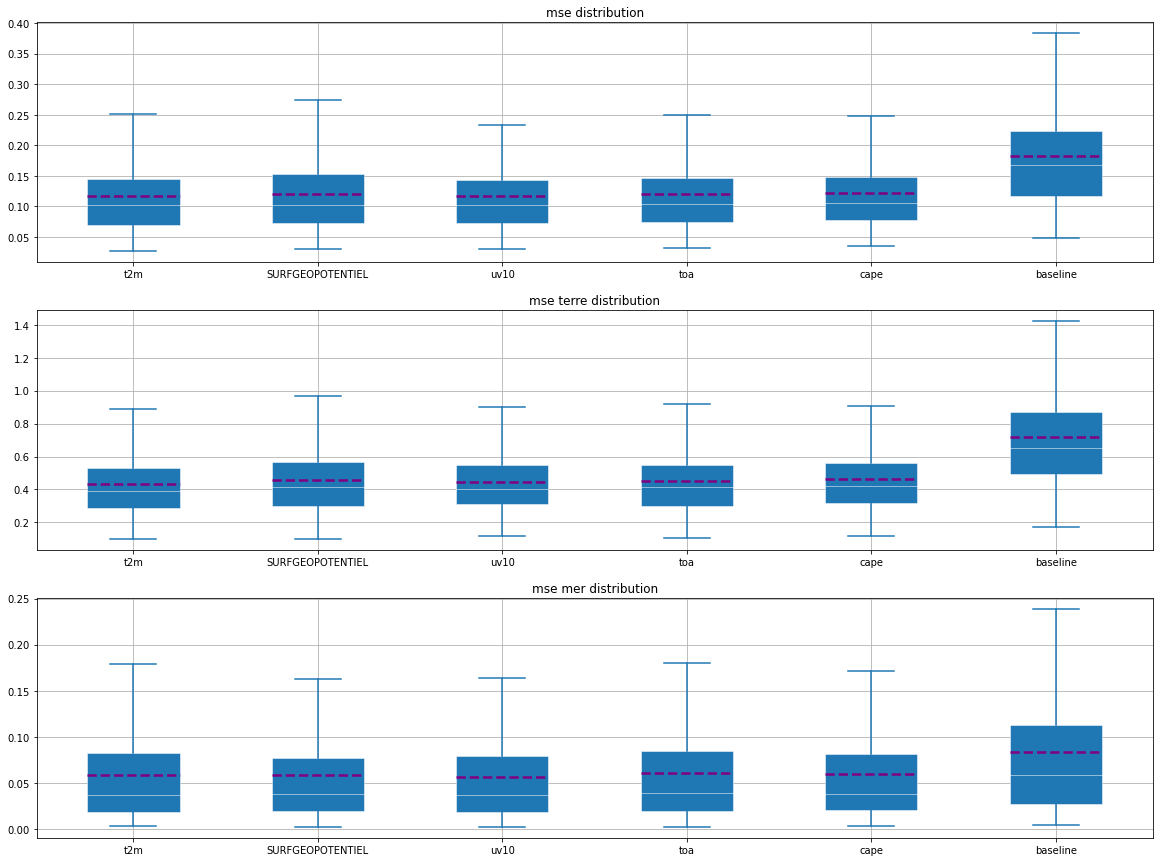

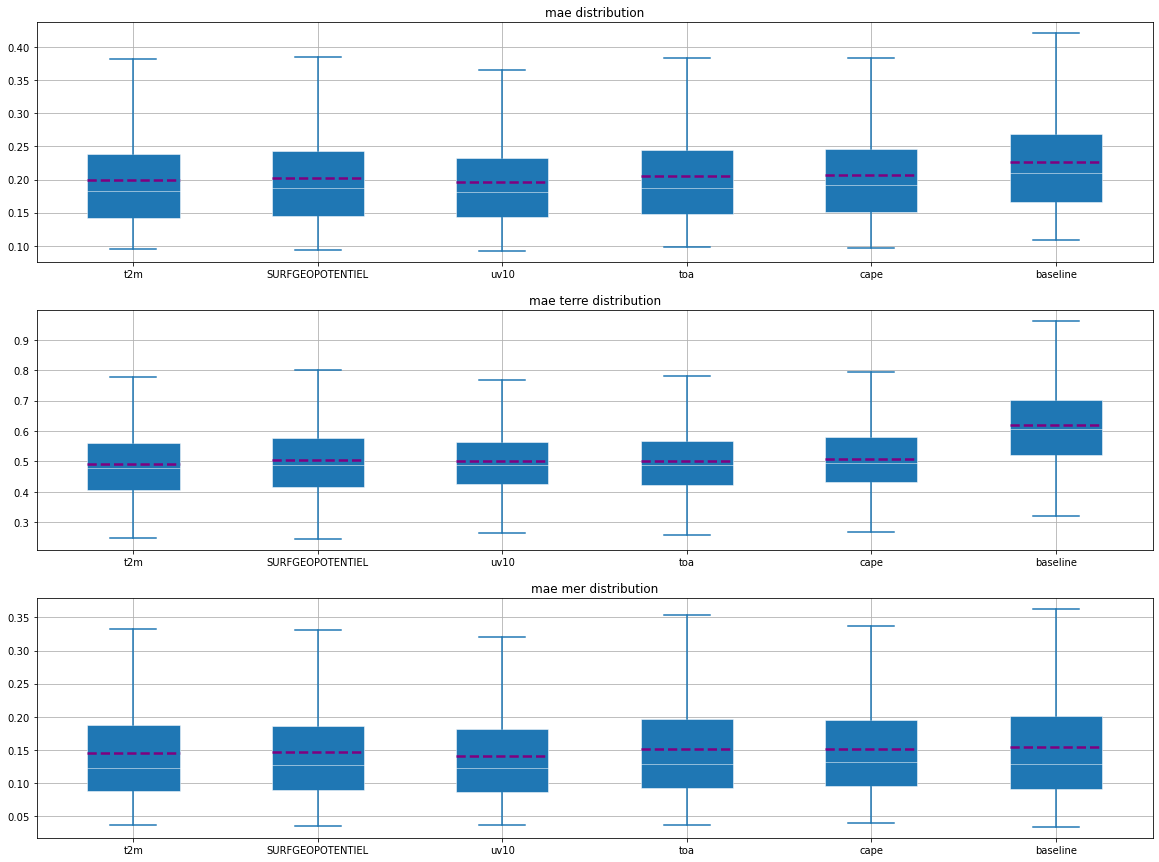

In [45]:
# boxplots
def synthesis_score_distribs(expes, metric, metric_name, dates_test, echeances, resample, data_test_location, baseline_location, param):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))    
    D = []
    D_terre = []
    D_mer = []
    labels = list(expes.name) + ['baseline']
    for i in range(len(expes)):
        working_dir = expes.dir[i]
        results_df = load_data(working_dir, dates_test, echeances, resample, data_test_location, baseline_location, param=param)
        score_baseline = get_scores(results_df, metric, metric_name)[metric_name + '_baseline_mean']
        score_pred = get_scores(results_df, metric, metric_name)[metric_name + '_y_pred_mean']
        score_baseline_terre = get_scores_terre(results_df, metric, metric_name)[metric_name + '_baseline_mean']
        score_pred_terre = get_scores_terre(results_df, metric, metric_name)[metric_name + '_y_pred_mean']
        score_baseline_mer = get_scores_mer(results_df, metric, metric_name)[metric_name + '_baseline_mean']
        score_pred_mer = get_scores_mer(results_df, metric, metric_name)[metric_name + '_y_pred_mean']
        
        D.append(score_pred)
        D_terre.append(score_pred_terre)
        D_mer.append(score_pred_mer)
    D.append(score_baseline)
    D_terre.append(score_baseline_terre)
    D_mer.append(score_baseline_mer)
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    VP = axs[0].boxplot(D, positions=range(0, 3*(len(expes)+1), 3), widths=1.5, patch_artist=True,
                    showmeans=True, meanline=True, showfliers=False,
                    medianprops={"color": "white", "linewidth": 0.5},
                    boxprops={"facecolor": "C0", "edgecolor": "white",
                            "linewidth": 0.5},
                    whiskerprops={"color": "C0", "linewidth": 1.5},
                    capprops={"color": "C0", "linewidth": 1.5},
                    meanprops = dict(linestyle='--', linewidth=2.5, color='purple'),
                    labels=labels)
    VP = axs[1].boxplot(D_terre, positions=range(0, 3*(len(expes)+1), 3), widths=1.5, patch_artist=True,
                    showmeans=True, meanline=True, showfliers=False,
                    medianprops={"color": "white", "linewidth": 0.5},
                    boxprops={"facecolor": "C0", "edgecolor": "white",
                            "linewidth": 0.5},
                    whiskerprops={"color": "C0", "linewidth": 1.5},
                    capprops={"color": "C0", "linewidth": 1.5},
                    meanprops = dict(linestyle='--', linewidth=2.5, color='purple'),
                    labels=labels)
    VP = axs[2].boxplot(D_mer, positions=range(0, 3*(len(expes)+1), 3), widths=1.5, patch_artist=True,
                    showmeans=True, meanline=True, showfliers=False,
                    medianprops={"color": "white", "linewidth": 0.5},
                    boxprops={"facecolor": "C0", "edgecolor": "white",
                            "linewidth": 0.5},
                    whiskerprops={"color": "C0", "linewidth": 1.5},
                    capprops={"color": "C0", "linewidth": 1.5},
                    meanprops = dict(linestyle='--', linewidth=2.5, color='purple'),
                    labels=labels)
    axs[0].set_title(metric_name + ' distribution')
    axs[1].set_title(metric_name + ' terre distribution')
    axs[2].set_title(metric_name + ' mer distribution')
    # axs.tick_params(axis='x', rotation=90)

    # plt.savefig(output_dir + 'distribution_' +  metric_name + '.png')

synthesis_score_distribs(expes, mse, 'mse', dates_test, echeances, resample, data_test_location, baseline_location, param)
synthesis_score_distribs(expes, mae, 'mae', dates_test, echeances, resample, data_test_location, baseline_location, param)